In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [94]:
df = pd.read_csv('age-pets.csv')
df_logistic = df[['age', 'pets']]

In [95]:
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62276 entries, 0 to 62275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     62276 non-null  int64 
 1   pets    62276 non-null  object
dtypes: int64(1), object(1)
memory usage: 973.2+ KB


In [96]:
X = np.array(df_logistic['age']).reshape(-1,1)
y = df_logistic['pets']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
logistic_model = LogisticRegression(solver='liblinear')
cv_results = cross_validate(logistic_model, X_train, y_train, cv=3)
cv_results

{'fit_time': array([0.03800964, 0.03400803, 0.03400779]),
 'score_time': array([0.01700258, 0.01700354, 0.01600361]),
 'test_score': array([0.59402662, 0.59402662, 0.59406239])}

In [99]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[pow(10,i) for i in range(0, 10)],'penalty':['l1','l2']}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), parameters,cv=3)
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([0.04601018, 0.03400771, 0.04634341, 0.03367432, 0.04567726,
        0.03367384, 0.04667719, 0.03300818, 0.0483439 , 0.03234005,
        0.04234385, 0.03300611, 0.04300952, 0.03300754, 0.04767736,
        0.03400739, 0.04367606, 0.03300754, 0.04334243, 0.03234053]),
 'std_fit_time': array([4.08316035e-03, 1.41433584e-03, 1.70023578e-03, 4.71595177e-04,
        4.92272589e-03, 4.71258002e-04, 3.68258503e-03, 6.25769923e-07,
        4.02823853e-03, 4.71539032e-04, 1.88784173e-03, 1.65563159e-06,
        1.41427968e-03, 2.97360213e-07, 4.11076829e-03, 1.41405487e-03,
        2.86830560e-03, 4.89903609e-07, 1.24723505e-03, 4.71538951e-04]),
 'mean_score_time': array([0.01700393, 0.01733724, 0.01667031, 0.01733708, 0.01733692,
        0.01767103, 0.01733716, 0.01666967, 0.01700385, 0.01666999,
        0.01700385, 0.01700433, 0.01667031, 0.0170037 , 0.01667062,
        0.01667031, 0.01700377, 0.01700385, 0.01700377, 0.01667031]),
 'std_score_time': array([1.12391596e-

In [100]:
clf.score(X_test, y_test)

0.5842967244701349

Text(0.5, 0, 'Age')

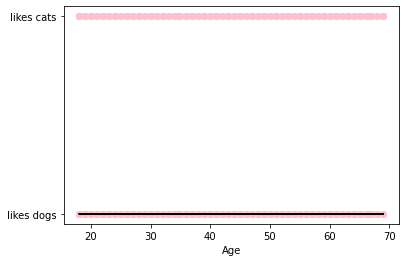

In [103]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='k')
plt.xlabel('Age')